In [1]:
# Code attribution: Yiyin Shen, Tyler Caraza-Harter
# Imports
import sklearn
import sklearn.cluster
import sklearn.impute
import geopandas
import pandas
import shapely
import matplotlib.pyplot as plt

In [2]:
# Read the US Map and the data
# See the example in the previous lecture for getting the same dataset without "pivot"
map = geopandas.read_file("cb_2018_us_state_20m.zip")
data = pandas.read_csv("SASUMMARY__ALL_AREAS_1998_2022.csv")
sub = data.pivot(index = "GeoName", columns = "LineCode", values = "2021")
sub["NAME"] = sub.index
combined = map.merge(sub, how = "left", on = "NAME")[["NAME", "geometry", 11, 12, 13]]
combined

,NAME,geometry,11,12,13
0,Maryland,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ...",58805,48549,106.223
1,Iowa,"POLYGON ((-96.62187 42.77925, -96.57794 42.827...",51922,42247,89.568
2,Delaware,"POLYGON ((-75.77379 39.72220, -75.75323 39.757...",51079,50700,97.677
3,Ohio,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ...",50733,44215,92.459
4,Pennsylvania,"POLYGON ((-80.51989 40.90666, -80.51964 40.987...",56289,48874,96.371
5,Nebraska,"POLYGON ((-104.05314 41.11446, -104.05245 41.2...",55943,45469,91.751
6,Washington,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704...",65315,52155,108.885
7,Puerto Rico,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ...",NaN,NaN,NaN
8,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",45191,39174,88.139
9,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",46644,39231,89.445


In [3]:
# Extract the feature columns and standardize
features = combined[[11, 12, 13]]
impute = sklearn.impute.SimpleImputer(strategy = "mean")
impute.fit(features)
full = impute.transform(features)
scale = sklearn.preprocessing.StandardScaler()
scale.fit(full)
x = scale.transform(full)
x[0:5, :]

array([[ 0.53930445,  0.13934152,  1.30270512],
       [-0.42558713, -0.79117111, -1.09569665],
       [-0.54376287,  0.45694429,  0.07203916],
       [-0.59226679, -0.50058894, -0.67937846],
       [ 0.18659964,  0.18732892, -0.11603125]])

(20.0, 50.0)

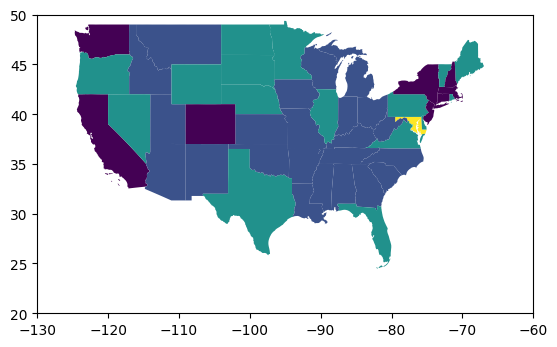

In [4]:
# Show clusters on map
cluster = sklearn.cluster.KMeans(n_clusters = 5, n_init = 1)
cluster.fit(x)
ax = map.plot(cluster.labels_)
ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

(20.0, 50.0)

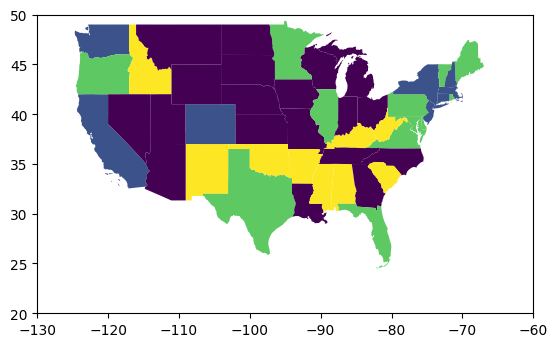

In [5]:
# Run the same function again
cluster.fit(x)
ax = map.plot(cluster.labels_)
ax.set_xlim(-130, -60)
ax.set_ylim(20, 50)

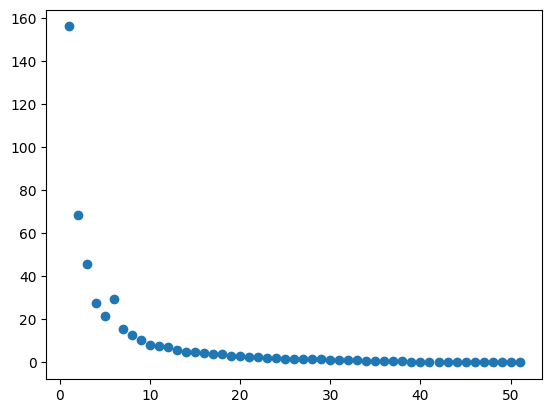

In [6]:
# Compare the total distortion (inertia) for k = 1, 2, ..., 50
td = []
n = range(1, len(x))
for k in n:
    cluster = sklearn.cluster.KMeans(n_clusters = k, n_init = 1)
    cluster.fit(x)
    td.append(cluster.inertia_)
plt.scatter(n, td)